<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



# Vizualizations and Statistics Using Boston Housing Data

#### Import the required libraries we need for the lab.


In [3]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [4]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [5]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [6]:
boston_df=pd.read_csv(boston_url)

## Descriptive Statistics and Visualizations

We will first look at a boxplot of the median value of owner-occupied homes (in $1000's) throughout Boston towns using the MEDV variable:

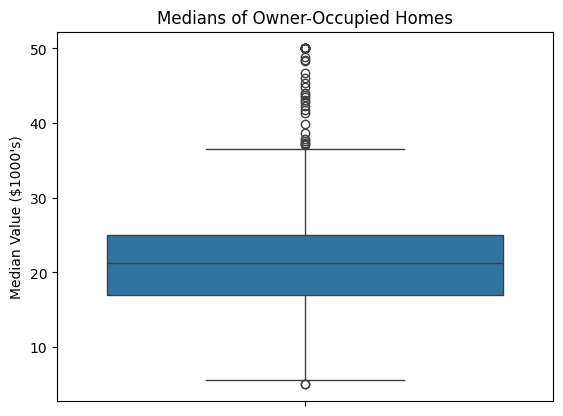

In [8]:
sns.boxplot(y = 'MEDV', data = boston_df).set(title='Medians of Owner-Occupied Homes', ylabel='Median Value ($1000\'s)')
pyplot.show()

The above boxplot indicates a median of about \\$21,000 for owner-occupied homes throughout Boston. We also see a minimum of ~\\$5,000 and maximum of ~\\$36,000 with a number of outliers.

Next, we will look at the number of towns bounded by the Charles River with a barplot where 0.0 means not bounded and 1.0 means bounded using the CHAS variable:

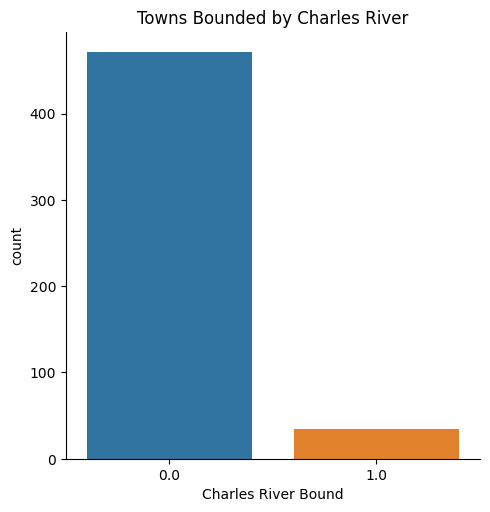


Number bounded: 35 
Number not bounded: 471


In [9]:
bar = sns.catplot(x = 'CHAS', kind = 'count', hue = 'CHAS',legend = False, data = boston_df)
bar.set(title = 'Towns Bounded by Charles River', xlabel = 'Charles River Bound')
pyplot.show()

b = boston_df[boston_df['CHAS']==1.0]['CHAS'].count()
nb = boston_df[boston_df['CHAS']==0.0]['CHAS'].count()
print(f'\nNumber bounded: {b} \nNumber not bounded: {nb}')

As illustrated by the barplot, only a few Boston towns are bounded by the Charles River compared to those not bounded. 

(The next task is to discretize the AGE variable into three groups. This task assumes that the AGE variable is a numerical age value; however, the AGE variable is a proportion (out of 100) and should not be used as a numerical age value. For the purposes of this assignment, though, we will assume it is a numerical age value.)

Now, let's look at a boxplot of the median value of owner-occupied homes vs. the proportion of owner-occupied houses built before 1940 using the MEDV and AGE variables. We must first discretize the age variable into three groups of 35 years and younger, between 35 and 70 years, and 70 years and older.

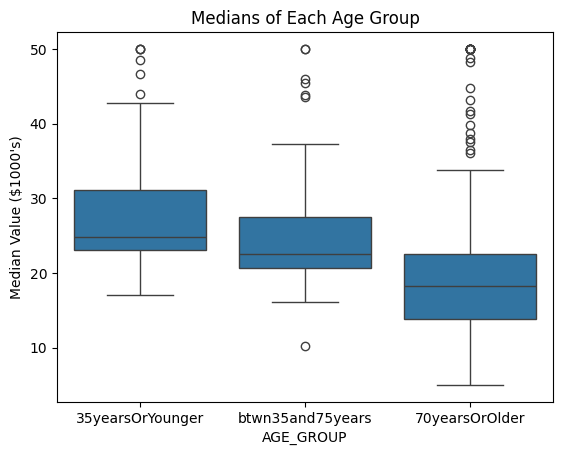

In [10]:
boston_df.loc[boston_df['AGE'] <= 35, 'AGE_GROUP'] = '35yearsOrYounger'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'AGE_GROUP'] = 'btwn35and75years'
boston_df.loc[boston_df['AGE'] >= 70, 'AGE_GROUP'] = '70yearsOrOlder'

med_vs_age_group = sns.boxplot(x = 'AGE_GROUP', y = 'MEDV', data = boston_df, order = ['35yearsOrYounger','btwn35and75years','70yearsOrOlder'])
med_vs_age_group.set(title='Medians of Each Age Group', ylabel='Median Value ($1000\'s)')

pyplot.show()

The boxplot shows a decreasing median as the age group increases. Note, though, that the 70+ age group has values spanning nearly all median values.

Let's now look at a scatterplot between nitric oxide concentrations and the proportion of non-retail business acres per town using the NOX and INDUS variables:

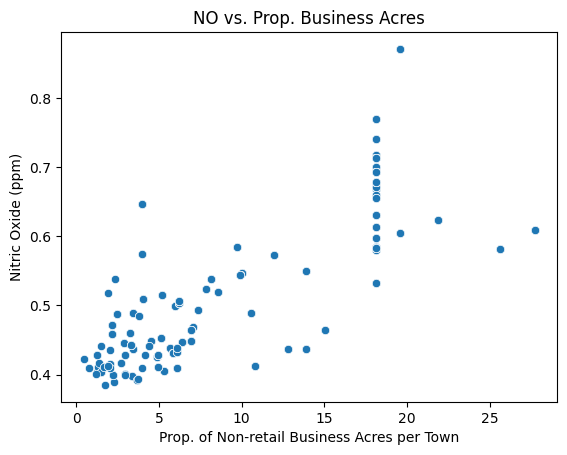

In [11]:
sns.scatterplot(x = 'INDUS', y = 'NOX', data = boston_df).set(title = 'NO vs. Prop. Business Acres', 
                                                              xlabel = 'Prop. of Non-retail Business Acres per Town', 
                                                              ylabel = 'Nitric Oxide (ppm)')
pyplot.show()

From the scatterplot, we can see that there appears to be a slight positive correlation between the proportion of non-retail business acres and the concentration of nitric oxide in the environment.

Next, let's look at a histogram of the pupil to teacher ratio by town using the PTRATIO variable:

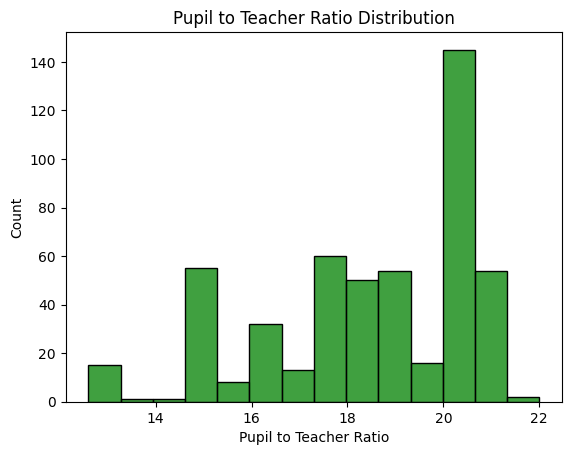

In [26]:
sns.histplot(boston_df['PTRATIO'], color = 'green').set(title = 'Pupil to Teacher Ratio Distribution',
                                                       xlabel = 'Pupil to Teacher Ratio')
pyplot.show()

## Statistical Tests

### Q1: Is there a significant difference in median value of houses bounded by the Charles river or not?

To answer this we need to run a T-test on the median value of houses of towns bounded by the Charles river and those not bounded. First, however, we need to determine if the MEDV of CHAS == 1.0 and CHAS == 0.0 have equal variance:

In [13]:
bounded = boston_df[boston_df['CHAS'] == 0.0]['MEDV']
unbounded = boston_df[boston_df['CHAS'] == 1.0]['MEDV']

scipy.stats.levene(bounded, unbounded, center = 'mean')

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

Since the levene test results in a p-value less than 0.05, the variances in MEDV of bounded and unbounded towns are unequal.

Now we can perform the T-test, setting equal_var to False. We will use $\alpha$ = 0.05.

$H_0$: There is no significant difference in the median value of houses bounded by the Charles river.\
$H_A$: There is a significant difference in the median value of houses bounded by the Charles river.

In [14]:
scipy.stats.ttest_ind(bounded, unbounded, equal_var=False)

TtestResult(statistic=-3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)

Since the p-value of the ttest is less than $\alpha$ = 0.05, we reject $H_0$ and conclude that there is a significant difference in the median value of houses bounded by the Charles river.

### Q2: Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)?

For this question, we will use an ANOVA test on the three age group categories: 35yearsOrYounger, btwn35and75years, and 70yearsOrOlder. First, we need to determine if the MEDV of the three age groups have equal variance:

In [15]:
thirtyfiveOrYounger = boston_df[boston_df['AGE_GROUP'] == '35yearsOrYounger']['MEDV']
btwn35and75 = boston_df[boston_df['AGE_GROUP'] == 'btwn35and75years']['MEDV']
seventyOrOlder = boston_df[boston_df['AGE_GROUP'] == '70yearsOrOlder']['MEDV']

scipy.stats.levene(thirtyfiveOrYounger, btwn35and75, seventyOrOlder, center = 'mean')

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

Since the levene test results in a p-value more than 0.05, the variances in MEDV are equal for the three age groups.

Again, we will use $\alpha = 0.05$.

$H_0$: There is no difference in median values of houses for each proportion of owner occupied units built prior to 1940.\
$H_A$: The median values of houses differs for at least one of the proportions of owner occupied units built prior to 1940.

In [16]:
scipy.stats.f_oneway(thirtyfiveOrYounger, btwn35and75, seventyOrOlder)

F_onewayResult(statistic=36.40764999196599, pvalue=1.7105011022702984e-15)

Since the p-value of the ANOVA test is less than $\alpha = 0.05$, we reject $H_0$ and conclude that the median values of houses differs for at least one of the proportions of owner occupied units built prior to 1940.

### Q3: Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?

We will use a Pearson Correlation test for this question using the NOX and INDUS variables with $\alpha = 0.05$.

$H_0$: There is no relationship between NO concentrations and proportion of non-retail business acres per town.\
$H_A$: There is a relationship between NO concentrations and proportion of non-retail business acres per town.

In [17]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

Since the p-value of the pearsonr test is less than $\alpha = 0.05$, we reject $H_0$ and conclude that there is a relationship between NO and INDUS. Given the resulting r statistic of 0.76, there is a relatively high positive correlation between NO concentration and proportion of non-retail business acres per town.

### Q4: What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes?

For this final question, we will perform a regression analysis on the DIS and MEDV variables with $\alpha = 0.05$.

$H_0:$ There is no impact of DIS on MEDV\
$H_A:$ There is an impact of DIS on MEDV

In [24]:
X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X)

model = sm.OLS(y,X).fit()
preds = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 21 Aug 2024   Prob (F-statistic):           1.21e-08
Time:                        16:42:24   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Since the p-value of $1.21 \times 10^{-8}$ is less than $\alpha = 0.05$, we reject $H_0$ and conclude that there is some impact of the weighted distances to five Boston employment centres on the median value of owner occupied homes. In fact, taking the square root of the $r^2$ value of $0.061$, we see that $r=0.25$, hence there is a weak positive correlation between between DIS and MEDV.